In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/train.csv')

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.shape

(404290, 6)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df['is_duplicate'].value_counts()

is_duplicate
0    255024
1    149263
Name: count, dtype: int64

<BarContainer object of 2 artists>

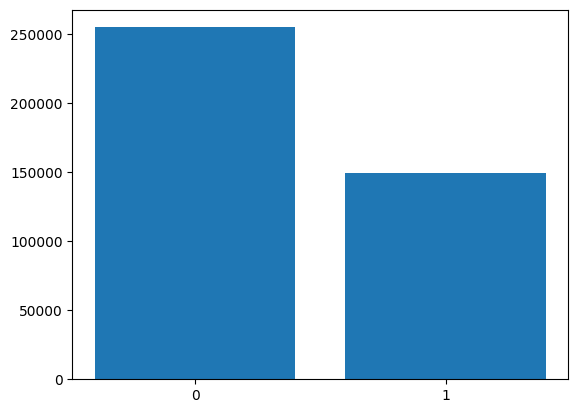

In [12]:
plt.bar(['0','1'], df['is_duplicate'].value_counts())

In [13]:
len(df.qid2.unique())

299362

In [14]:
len(df.qid1.unique())

290652

In [15]:
# Repeated questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537929
Number of questions getting repeated 111778


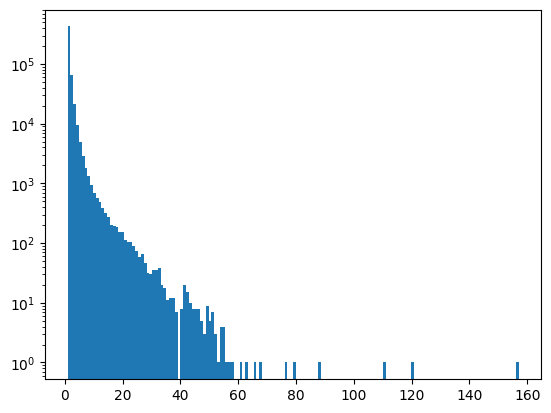

In [16]:
# Repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [17]:
# perform simple BOW

In [18]:
df1 = df.sample(50000, random_state=2)

In [19]:
df1

,id,qid1,qid2,question1,question2,is_duplicate
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1
...,...,...,...,...,...,...
217289,217289,183375,206459,What is the best motivational book?,What are some motivational books?,1
389109,389109,241246,288221,What is a narrative paragraph?,What is a narrative paragraph? What are some e...,1
245364,245364,44714,358201,Is it healthy for dogs to eat bones?,Is it safe to feed my dog cooked ham bones?,0
86149,86149,145328,145329,"If a boy doesn't respond to my messages, shoul...",How do I message to a girl who doesn't know me?,0


In [20]:
df1.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [21]:
df1.duplicated().sum()

0

In [22]:
new_df = df1[['question1','question2']]

In [22]:
new_df

,question1,question2
331535,How can I learn Norwegian?,What is the quickest way to learn Norwegian?
45407,How are currency rates determined?,Where and how are exchange rates determined?
286200,What is substitution?,What is a substitute for caciocavallo?
157195,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...
154346,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...
...,...,...
217289,What is the best motivational book?,What are some motivational books?
389109,What is a narrative paragraph?,What is a narrative paragraph? What are some e...
245364,Is it healthy for dogs to eat bones?,Is it safe to feed my dog cooked ham bones?
86149,"If a boy doesn't respond to my messages, shoul...",How do I message to a girl who doesn't know me?


In [23]:
total_que= list(list(new_df['question1']) + list(new_df.question2))

In [24]:
len(total_que)

100000

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cv = CountVectorizer(max_features=1000)

In [27]:
q1_arr, q2_arr = np.vsplit(cv.fit_transform(total_que).toarray(),2)

In [28]:
q1_arr.shape

(50000, 1000)

In [29]:
temp_df1 = pd.DataFrame(q1_arr, index= new_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= new_df.index)

In [30]:
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 2000)

In [31]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
331535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
389109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
temp_df['is_duplicate'] = df1['is_duplicate']

In [33]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,is_duplicate
331535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
286200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
154346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [39]:
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [44]:
def Model(model):
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred)
    return y_pred, acc_score

In [45]:
y_pred, acc = Model(XGBClassifier())

In [48]:
print(y_pred)
print('accuracy' , acc)

[1 1 0 ... 0 0 0]
accuracy 0.7323


In [45]:
# length of both question
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df.question2.str.len()

In [46]:
# total words in each question
new_df['q1_words'] = new_df['question1'].apply(lambda x :  len(x.split()))
new_df['q2_words'] = new_df['question2'].apply(lambda x :  len(x.split()))

In [47]:
#comman word in both words
def commanWords(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    # print(w1)
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))  
    # print(w2)
    return len(w1 & w2)

In [48]:
new_df['word_common'] = new_df.apply(commanWords, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,word_common
354382,354382,54512,483500,What is the difference between an electron and...,What is the difference between [math]{ \beta ...,0,63,101,11,17,6
59226,59226,103772,103773,What are the possible skill shortages in the t...,What are the possible skill shortages in time ...,1,58,54,11,10,10
376011,376011,507116,507117,Why does Quora not let me delete a question on...,Why does Quora not let me delete a question re...,1,68,121,13,21,9
212220,212220,317251,317252,If I use dog body language to communicate with...,"Romney said ""Dogs drive Douglas dizzy"" as an e...",0,105,232,21,40,6
102711,102711,169913,72431,What are the top 10 TV series one should genui...,What TV series are worth watching?,1,57,34,11,6,4


In [49]:
{'money', 'making', 'how', 'start', 'can', 'using', 'i', 'internet?'} & {'to', 'online?', 'money', 'how', 'start', 'can', 'i', 'make'}

{'can', 'how', 'i', 'money', 'start'}

In [50]:
# total words in both que. without repeting
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [51]:
new_df['word_total'] = new_df.apply(total_words, axis=1)

In [52]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,word_common,word_total
354382,354382,54512,483500,What is the difference between an electron and...,What is the difference between [math]{ \beta ...,0,63,101,11,17,6,25
59226,59226,103772,103773,What are the possible skill shortages in the t...,What are the possible skill shortages in time ...,1,58,54,11,10,10,20


In [53]:
#Word share
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.sample()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,word_common,word_total,word_share
66709,66709,96947,115582,How do I get my husband to stop drinking?,How do I get my dad to stop drinking?,0,41,37,9,9,8,18,0.44


In [54]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
354382,What is the difference between an electron and...,What is the difference between [math]{ \beta ...
59226,What are the possible skill shortages in the t...,What are the possible skill shortages in time ...
376011,Why does Quora not let me delete a question on...,Why does Quora not let me delete a question re...
212220,If I use dog body language to communicate with...,"Romney said ""Dogs drive Douglas dizzy"" as an e..."
102711,What are the top 10 TV series one should genui...,What TV series are worth watching?


In [55]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(50000, 8)


,is_duplicate,q1_len,q2_len,q1_words,q2_words,word_common,word_total,word_share
354382,0,63,101,11,17,6,25,0.24
59226,1,58,54,11,10,10,20,0.50
376011,1,68,121,13,21,9,33,0.27
212220,0,105,232,21,40,6,51,0.12
102711,1,57,34,11,6,4,17,0.24


In [56]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=1000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [57]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 2000)

In [58]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(50000, 2008)


,is_duplicate,q1_len,q2_len,q1_words,q2_words,word_common,word_total,word_share,0,1,...,990,991,992,993,994,995,996,997,998,999
354382,0,63,101,11,17,6,25,0.24,0,0,...,0,0,0,0,0,0,0,0,0,0
59226,1,58,54,11,10,10,20,0.50,0,0,...,0,0,0,0,0,0,0,0,0,0
376011,1,68,121,13,21,9,33,0.27,0,0,...,0,0,0,0,0,0,0,0,0,0
212220,0,105,232,21,40,6,51,0.12,0,0,...,0,0,0,0,0,0,0,0,0,0
102711,1,57,34,11,6,4,17,0.24,0,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7822